In [1]:
import azureml.core 
print(azureml.core.VERSION) 
from azureml.core import Workspace 
ws = Workspace.from_config()
ws.get_details()

1.57.0
Performing interactive authentication. Please follow the instructions on the terminal.


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code CM4KPQTWE to authenticate.


Interactive authentication successfully completed.


{'id': '/subscriptions/5f7e7551-1c5d-42a7-9cdd-7582134d0f5f/resourceGroups/iiot-book2-resource/providers/Microsoft.MachineLearningServices/workspaces/iiot-book2-ml-workspace',
 'name': 'iiot-book2-ml-workspace',
 'identity': {'principal_id': '4cd35736-b2a7-4978-9c70-c5155633054e',
  'tenant_id': 'cfb4f1d4-a84e-4e91-9df0-435862090a34',
  'type': 'SystemAssigned'},
 'location': 'eastus2',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'tags': {},
 'sku': 'Basic',
 'workspaceid': '1352f7c8-4b9b-4670-9827-bb2f337ec25b',
 'sdkTelemetryAppInsightsKey': 'e1f7b545-6243-4abf-ba76-c5691d2edb62',
 'description': '',
 'friendlyName': 'iiot-book2-ml-workspace',
 'creationTime': '2024-08-13T10:36:53.1780731Z',
 'keyVault': '/subscriptions/5f7e7551-1c5d-42a7-9cdd-7582134d0f5f/resourceGroups/iiot-book2-resource/providers/Microsoft.Keyvault/vaults/iiotbook2mlwor9593714222',
 'applicationInsights': '/subscriptions/5f7e7551-1c5d-42a7-9cdd-7582134d0f5f/resourceGroups/iiot-book2-resource/provide

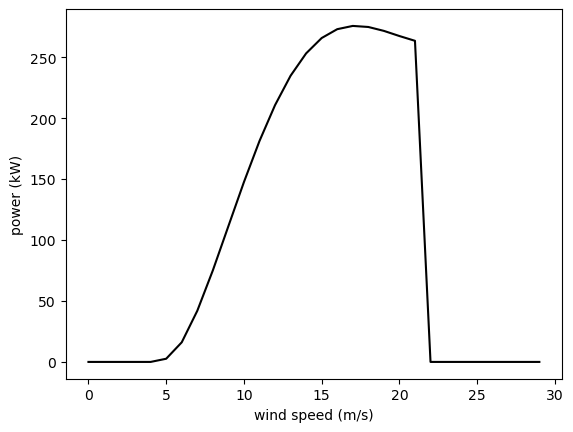

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt 
import numpy as np 


def wind_turbine_model(x): 
    # cut-in speed vs cut-out speed 
    if x<4.5 or x>21.5: 
        return 0.0 
    # standard operability 
    return 376.936 - 195.8161*x + 33.75734*x**2 - 2.212492*x**3 + 0.06309095*x**4 - 0.0006533647*x**5 

reference_power = [wind_turbine_model(x) for x in range(0,30)] 

# show data and reference 
fig, ax = plt.subplots() 
ax.plot(reference_power,'k') 
ax.set_xlabel('wind speed (m/s)') 
ax.set_ylabel('power (kW)') 
plt.show() 

In [3]:
from azureml.core import Experiment  

# create a new experiment  
exp = Experiment(workspace=ws, name='wind-turbine-experiment')  

# start a run 
run = exp.start_logging()
run.log_list('Wind Turbine Model', reference_power) # log a list of values  

# finish the run  
run.complete()  

print(run.get_portal_url())

ExperimentExecutionException: ExperimentExecutionException:
	Message: {
    "error_details": {
        "componentName": "project",
        "correlation": {
            "operation": "00767d971a3555719d01ccb72b6cb8ca",
            "request": "bbaf428ad4733d64"
        },
        "environment": "eastus2",
        "error": {
            "code": "UserError",
            "message": "Please make sure workspace msi has permission to the workspace keyvault and workspace keyvault exists"
        },
        "location": "eastus2",
        "statusCode": 400,
        "time": "2024-08-13T15:51:27.9702947+00:00"
    },
    "status_code": 400,
    "url": "https://eastus2.experiments.azureml.net/content/v1.0/subscriptions/5f7e7551-1c5d-42a7-9cdd-7582134d0f5f/resourceGroups/iiot-book2-resource/providers/Microsoft.MachineLearningServices/workspaces/iiot-book2-ml-workspace/snapshots/latest/metadata"
}
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "{\n    \"error_details\": {\n        \"componentName\": \"project\",\n        \"correlation\": {\n            \"operation\": \"00767d971a3555719d01ccb72b6cb8ca\",\n            \"request\": \"bbaf428ad4733d64\"\n        },\n        \"environment\": \"eastus2\",\n        \"error\": {\n            \"code\": \"UserError\",\n            \"message\": \"Please make sure workspace msi has permission to the workspace keyvault and workspace keyvault exists\"\n        },\n        \"location\": \"eastus2\",\n        \"statusCode\": 400,\n        \"time\": \"2024-08-13T15:51:27.9702947+00:00\"\n    },\n    \"status_code\": 400,\n    \"url\": \"https://eastus2.experiments.azureml.net/content/v1.0/subscriptions/5f7e7551-1c5d-42a7-9cdd-7582134d0f5f/resourceGroups/iiot-book2-resource/providers/Microsoft.MachineLearningServices/workspaces/iiot-book2-ml-workspace/snapshots/latest/metadata\"\n}"
    }
}

In [ ]:
# clean the workspace 
ws.delete(delete_dependent_resources=True) 